In [2]:
from collections import Counter
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import json

#Connect to Database
conn = sqlite3.connect('iotaDB.db')
cursor = conn.cursor()


# Number of Transactions by Month

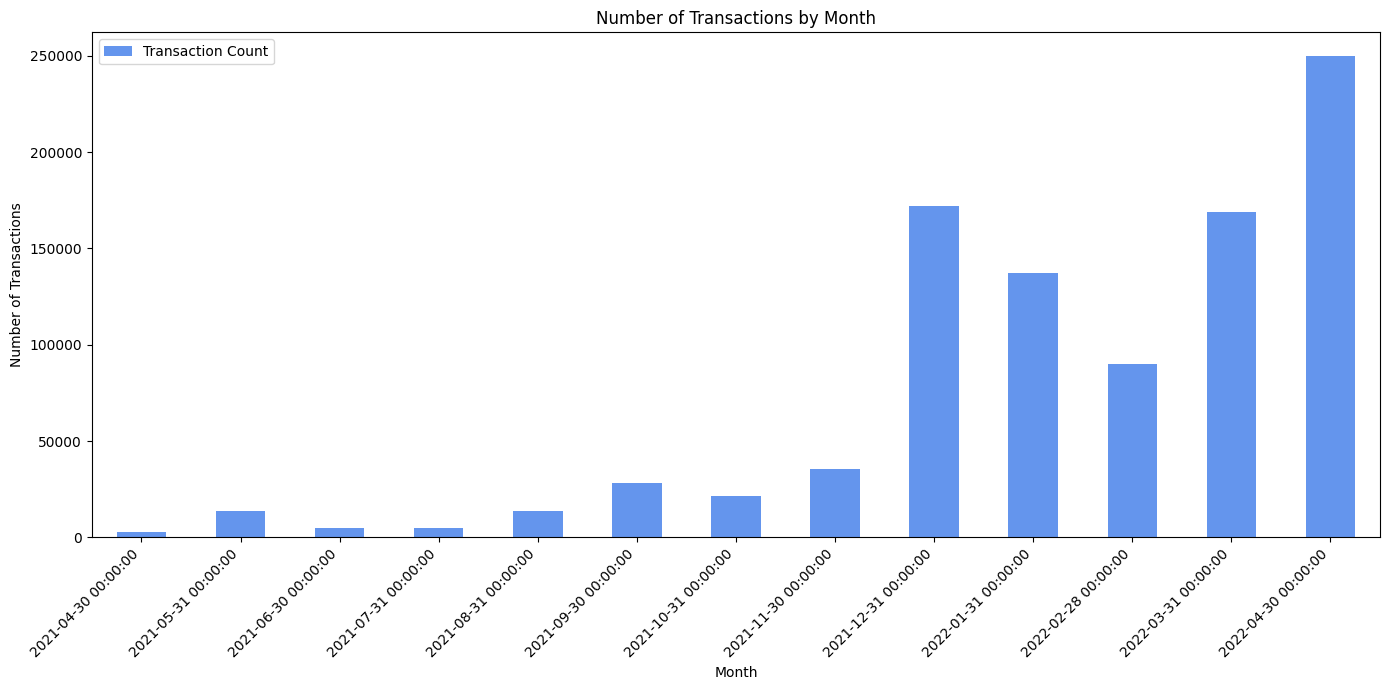

In [3]:

query = """
SELECT timestamp, COUNT (*) as transaction_count
FROM Transactions
GROUP BY timestamp
ORDER BY timestamp

"""
cursor.execute(query)
data = cursor.fetchall()



df = pd.DataFrame(data,columns= ['Timestamp', 'Transaction Count'])
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_resampled = df.set_index('Timestamp').resample('ME').sum()

# Plotting the results
plt.figure(figsize=(14, 7))
df_resampled.plot(kind='bar', color='cornflowerblue', ax=plt.gca())
plt.title('Number of Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

# Show the plot
plt.show()

# Number of Transactions by Year

C:\Users\sinth\AppData\Local\Temp\ipykernel_16840\3121810584.py:16: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_resampled = df.set_index('Timestamp').resample('Y').sum()


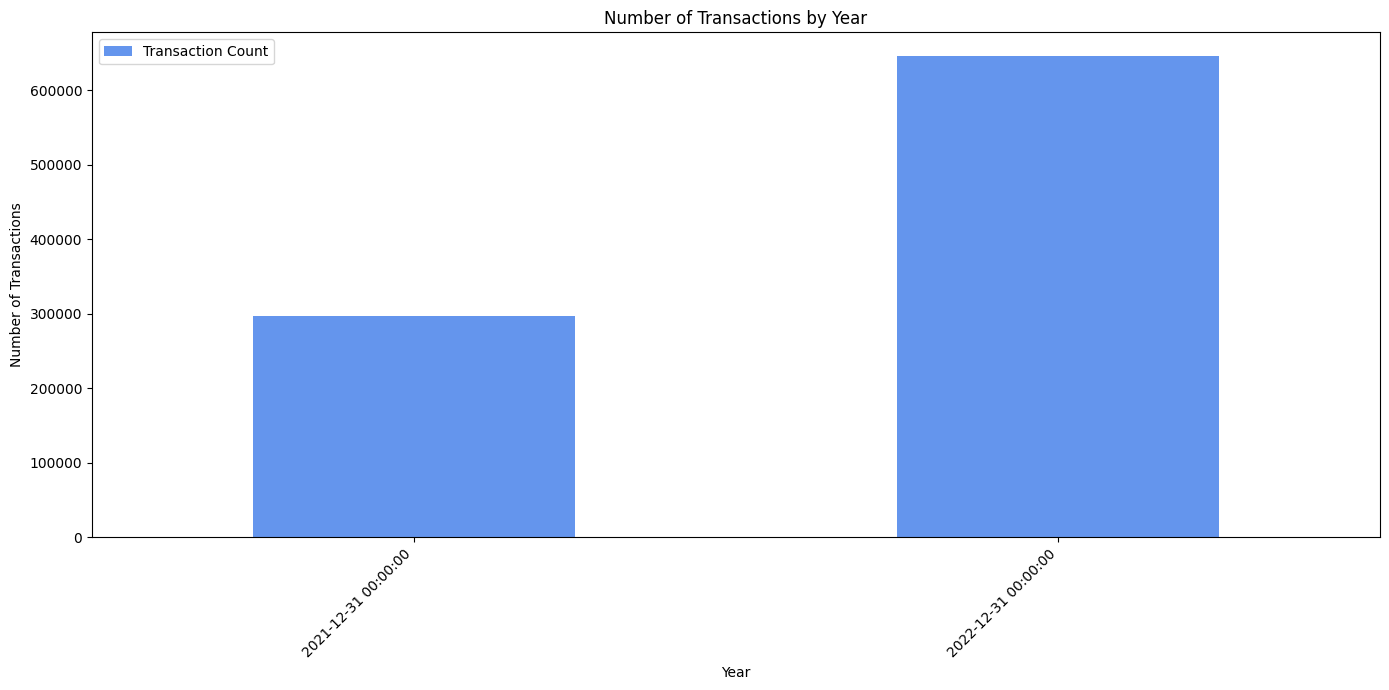

In [35]:
query = """
SELECT timestamp, COUNT (*) as transaction_count
FROM Transactions
GROUP BY timestamp
ORDER BY timestamp

"""
cursor.execute(query)
data = cursor.fetchall()

df = pd.DataFrame(data,columns= ['Timestamp', 'Transaction Count'])
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_resampled = df.set_index('Timestamp').resample('Y').sum()

# Plotting the results
plt.figure(figsize=(14, 7))
df_resampled.plot(kind='bar', color='cornflowerblue', ax=plt.gca())
plt.title('Number of Transactions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

# Show the plot
plt.show()

# Identify the address involved in the most transactions

In [34]:
# Query the database to get all input and output addresses
query = """
SELECT input_addresses_x, output_addresses_y FROM Transactions
"""
cursor.execute(query)
rows = cursor.fetchall()


# Initialize a counter to tally occurrences of each address
address_counter = Counter()


# Process each row to extract addresses and count their occurrences
for input_addresses_x, output_addresses_y in rows:
    # Load the JSON data for input and output addresses
    input_addresses = json.loads(input_addresses_x)
    output_addresses = json.loads(output_addresses_y)
    
    # Update the counter for each address in the inputs and outputs
    address_counter.update(input_addresses)
    address_counter.update(output_addresses)

# Find the address with the most transactions
most_common_address, most_transactions = address_counter.most_common(1)[0]


print(f"The address with the most transactions is {most_common_address} with {most_transactions} transactions.")


The address with the most transactions is b1cd46b98ec8501da1a85aa9ce9c9a52e17e672b6b18112a04174612451a7359 with 128835 transactions.


# Transactions per Month for Address with the most Transactions


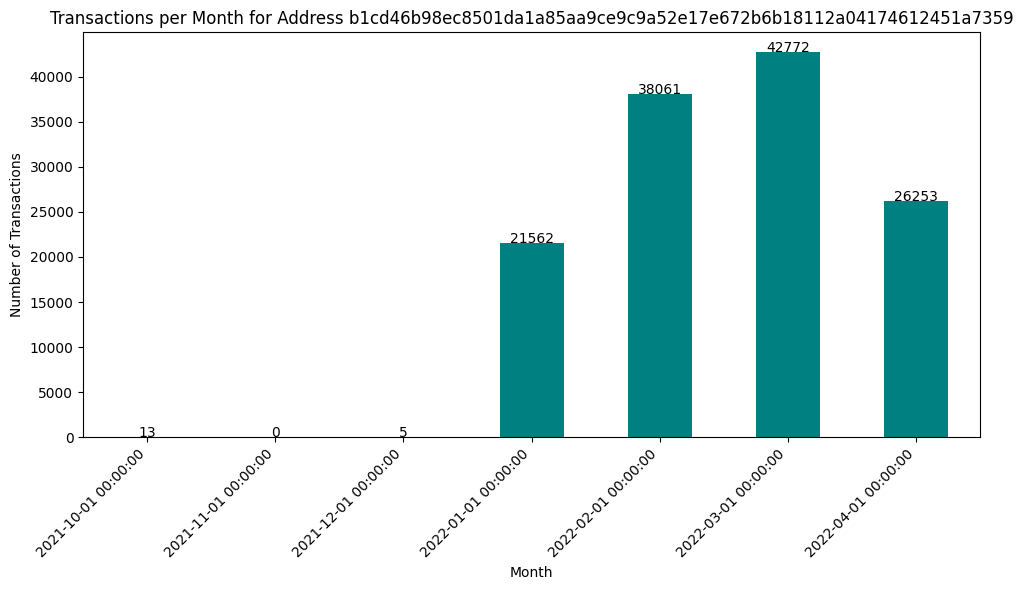

In [43]:
import sqlite3
import json
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('iotaDB.db')
cursor = conn.cursor()

# Specify the address you want to analyze
specific_address = most_common_address

# Query the database to get timestamps for transactions involving the specific address
query = """
SELECT timestamp, input_addresses_x, output_addresses_y
FROM Transactions
"""
cursor.execute(query)
rows = cursor.fetchall()

# Close the database connection


# Create a DataFrame to store transaction timestamps
transactions = {'Timestamp': [], 'Count': []}

# Check each transaction to see if the specific address is part of the inputs or outputs
for timestamp, input_addresses_x, output_addresses_y in rows:
    input_addresses = json.loads(input_addresses_x)
    output_addresses = json.loads(output_addresses_y)
    # Count the transaction if the specific address is in inputs or outputs
    if specific_address in input_addresses or specific_address in output_addresses:
        transactions['Timestamp'].append(timestamp)
        transactions['Count'].append(1)  # Each row represents one transaction

# Convert the dictionary to a DataFrame
df = pd.DataFrame(transactions)

# Check if DataFrame is empty
if df.empty:
    print("No transactions found for the specified address.")
else:
    # Convert timestamp to datetime type
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

    # Resample data by month, summing transaction counts for each month
    df_resampled = df.set_index('Timestamp').resample('MS').sum()  # 'MS' stands for month start

    # Plotting the results
    plt.figure(figsize=(10, 6))
    bars = df_resampled['Count'].plot(kind='bar', color='teal')
    plt.title(f'Transactions per Month for Address {specific_address}')
    plt.xlabel('Month')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45, ha='right')  # Rotate date labels for better readability
    plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

    # Adding text labels above the bars
    for i, value in enumerate(df_resampled['Count']):
        plt.text(i, value, str(value) , ha='center')

    # Show the plot
    plt.show()


In [60]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('iotaDB.db')
cursor = conn.cursor()

# Query the database to get timestamps for all transactions
query = """
SELECT timestamp FROM Transactions
"""
cursor.execute(query)
data = cursor.fetchall()

# Close the database connection
conn.close()

# Create a DataFrame from the results
df = pd.DataFrame(data, columns=['Timestamp'])

# Convert timestamp to datetime type
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set the timestamp as the DataFrame index
df.set_index('Timestamp', inplace=True)




# 1 Analyzing transaction frequencies over time (Monthly)

C:\Users\sinth\AppData\Local\Temp\ipykernel_16840\1871702031.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_transactions = df.resample('M').size()


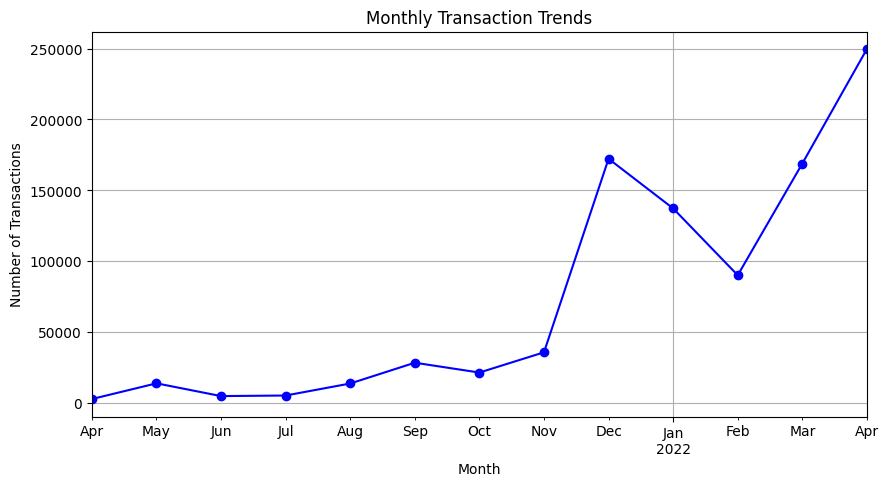

In [46]:

monthly_transactions = df.resample('M').size()

# Plotting Monthly Transactions
plt.figure(figsize=(10, 5))
monthly_transactions.plot(kind='line', marker='o', color='b', title='Monthly Transaction Trends')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()



# 1.1 Analyzing transaction frequencies over time (Daily)

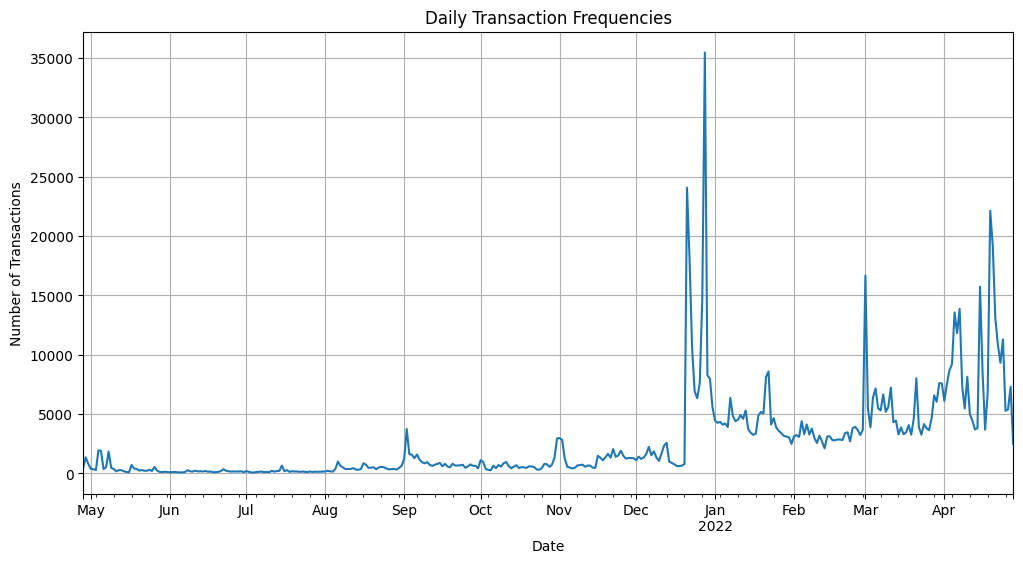

In [4]:
conn = sqlite3.connect('iotaDB.db')
cursor = conn.cursor()
query = """
SELECT timestamp FROM Transactions
"""
cursor.execute(query)
data = cursor.fetchall()

# Close the database connection
conn.close()
# Create a DataFrame
df = pd.DataFrame(data, columns=['Timestamp'])


df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Count'] = 1
transaction_counts = df.resample('D', on='Timestamp')['Count'].sum()

plt.figure(figsize=(12, 6))
transaction_counts.plot(title='Daily Transaction Frequencies')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

# 2. Daily Transaction Volume

C:\Users\sinth\AppData\Local\Temp\ipykernel_16840\4232320252.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_average_daily_transactions = daily_transactions.resample('M').mean()


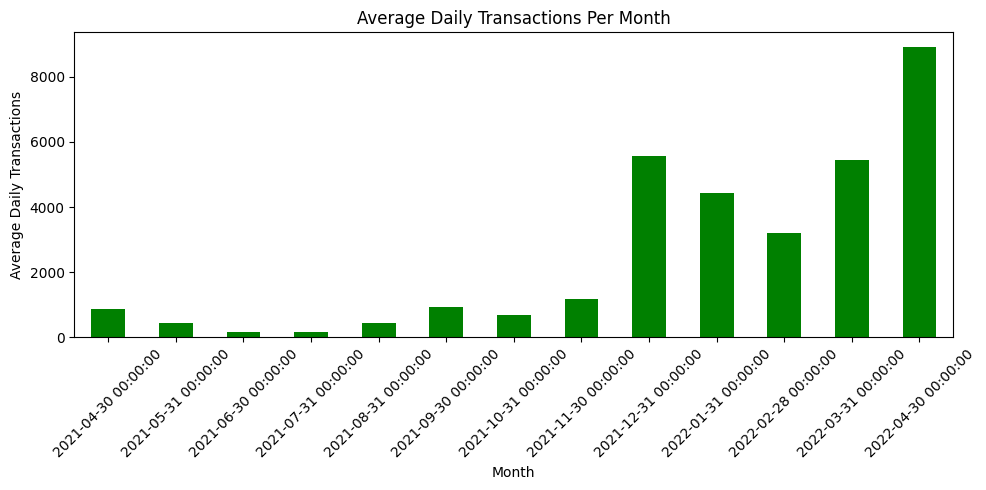

In [47]:

daily_transactions = df.resample('D').size()
monthly_average_daily_transactions = daily_transactions.resample('M').mean()

# Plotting Daily Transaction Volume per Month
plt.figure(figsize=(10, 5))
monthly_average_daily_transactions.plot(kind='bar', color='green', title='Average Daily Transactions Per Month')
plt.xlabel('Month')
plt.ylabel('Average Daily Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# 3. Peak Transaction Hours

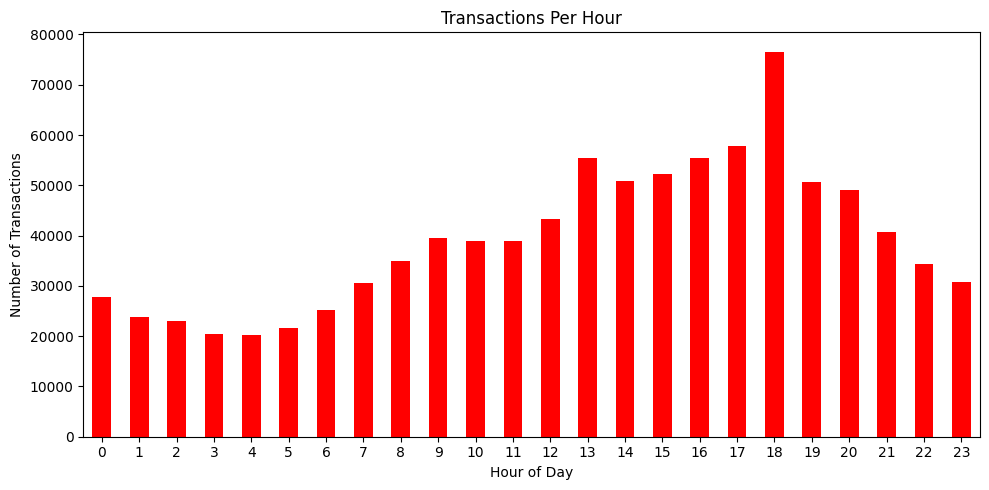

In [48]:

df['Hour'] = df.index.hour
hourly_transactions = df.groupby('Hour').size()

# Plotting Peak Transaction Hours
plt.figure(figsize=(10, 5))
hourly_transactions.plot(kind='bar', color='red', title='Transactions Per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. Weekly Transaction Patterns

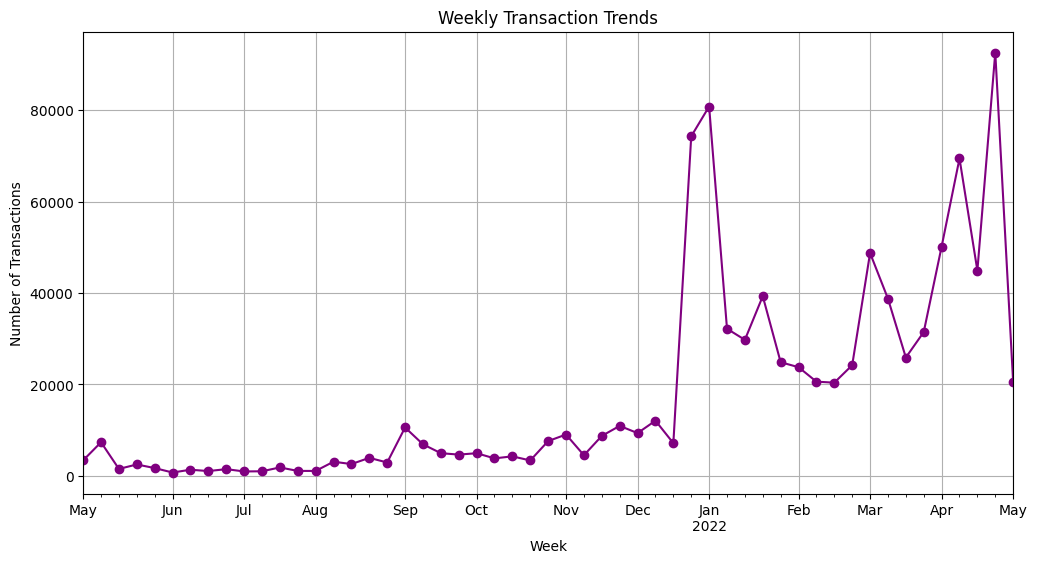

In [54]:

weekly_transactions = df.resample('W').size()

# Plotting Weekly Transactions
plt.figure(figsize=(12, 6))
weekly_transactions.plot(kind='line', marker='o', color='purple', title='Weekly Transaction Trends')
plt.xlabel('Week')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()




# 5. Day of Week Transaction Trends

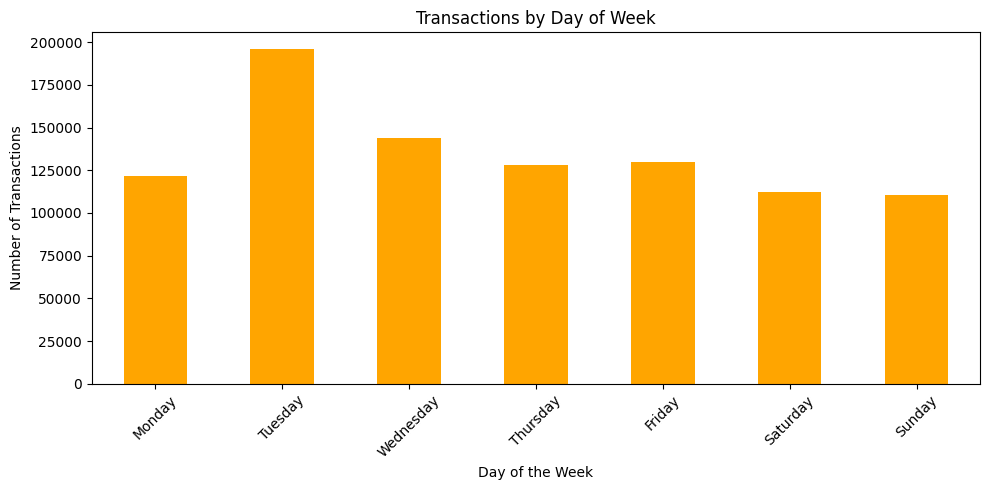

In [52]:

df['DayOfWeek'] = df.index.dayofweek
daily_weekday_transactions = df.groupby('DayOfWeek').size()

# Mapping day of the week for better readability
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_weekday_transactions.index = [days[i] for i in daily_weekday_transactions.index]

# Plotting Day of Week Transaction Trends
plt.figure(figsize=(10, 5))
daily_weekday_transactions.plot(kind='bar', color='orange', title='Transactions by Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# 6. Month-over-Month Change

C:\Users\sinth\AppData\Local\Temp\ipykernel_16840\4056012128.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_transactions = df.resample('M').size()


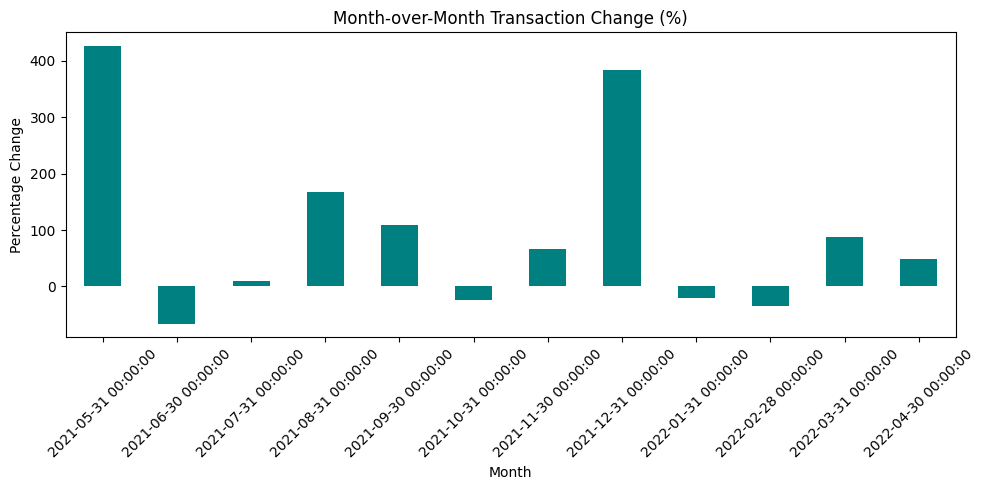

In [55]:

monthly_transactions = df.resample('M').size()
month_over_month_change = monthly_transactions.pct_change().dropna() * 100  # Percentage change

# Plotting Month-over-Month Transaction Change
plt.figure(figsize=(10, 5))
month_over_month_change.plot(kind='bar', color='teal', title='Month-over-Month Transaction Change (%)')
plt.xlabel('Month')
plt.ylabel('Percentage Change')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()